In [87]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [85]:
# for gathering latitude and longitude
from geopy.geocoders import Nominatim

In [83]:
import folium

In [3]:
url = 'https://docs.google.com/spreadsheets/u/0/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml#'
dfs = pd.read_html(url, encoding='utf8')

### State wise data

In [12]:
statewise_df = dfs[1].copy()
statewise_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1.0,State,NaN,Confirmed,Recovered,Deaths,Active,Last_Updated_Time
1,2.0,Total,NaN,904,83,19,802,28/03/2020 11:32:23
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Kerala,NaN,176,12,0,164,28/03/2020 10:02:25
4,4.0,Maharashtra,NaN,162,25,4,133,28/03/2020 10:02:26


In [13]:
statewise_df.drop(['Unnamed: 0','Unnamed: 2','Unnamed: 7'],axis=1,inplace=True)
statewise_df.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,State,Confirmed,Recovered,Deaths,Active
1,Total,904,83,19,802
2,NaN,NaN,NaN,NaN,NaN
3,Kerala,176,12,0,164
4,Maharashtra,162,25,4,133


In [14]:
#make the first row as column headers 
def col_headers(df):
    df.columns = df.iloc[0]
    df.drop(df.index[0],inplace=True)
    #statewise_df.head()
    return df

In [15]:
statewise_df = col_headers(statewise_df)

In [16]:
statewise_df.isna().sum()

0
State        1
Confirmed    1
Recovered    1
Deaths       1
Active       1
dtype: int64

In [17]:
statewise_df.dropna(axis=0,inplace=True)
statewise_df.reset_index(drop=True, inplace=True)
statewise_df.head()

,State,Confirmed,Recovered,Deaths,Active
0,Total,904,83,19,802
1,Kerala,176,12,0,164
2,Maharashtra,162,25,4,133
3,Karnataka,64,5,3,56
4,Telangana,59,1,0,58


In [18]:
statewise_df.dtypes

0
State        object
Confirmed    object
Recovered    object
Deaths       object
Active       object
dtype: object

In [19]:
statewise_df = statewise_df.astype({"Confirmed": 'int', "Recovered": 'int', "Deaths": 'int', "Active": 'int'})
statewise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
State        38 non-null object
Confirmed    38 non-null int32
Recovered    38 non-null int32
Deaths       38 non-null int32
Active       38 non-null int32
dtypes: int32(4), object(1)
memory usage: 1.0+ KB


<Figure size 432x288 with 0 Axes>

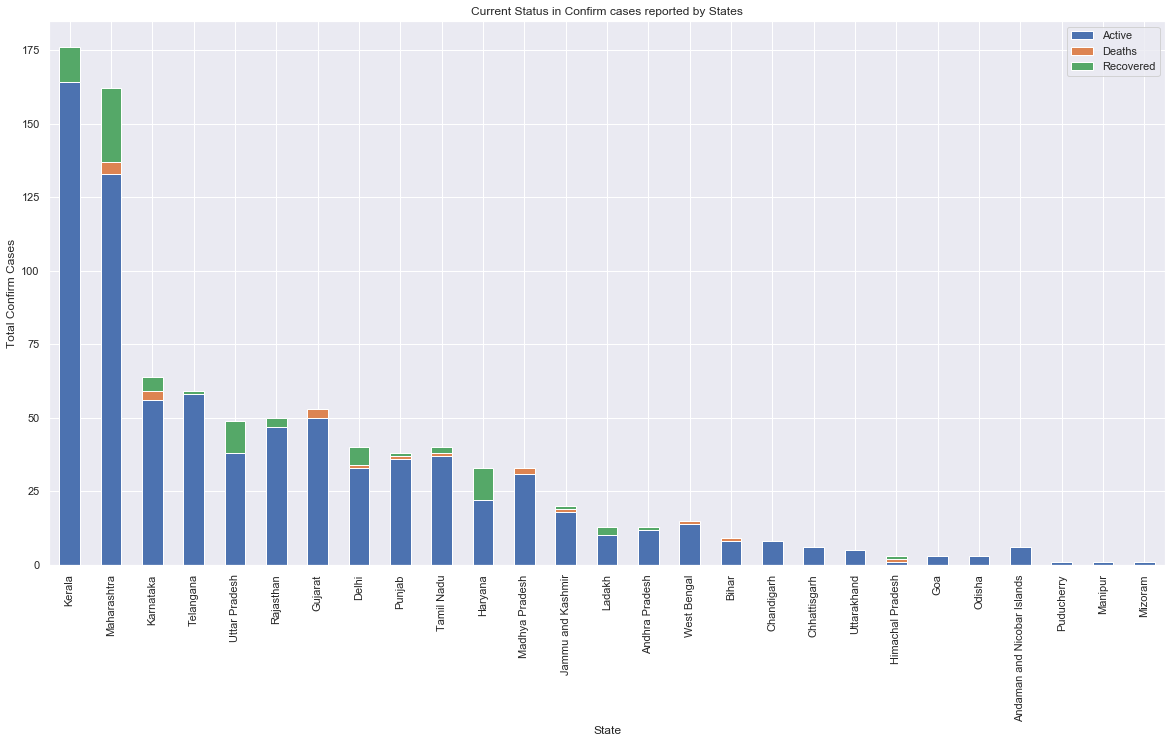

In [20]:
plt.figure()

#cases_per_state = statewise_df.sort_values('Confirmed',ascending=False)
#sns.barplot(x='Confirmed', y='State', data=cases_per_state.loc[1:,])
toplot = statewise_df[statewise_df['Confirmed']>0]
toplot = toplot[['State','Active','Deaths','Recovered']]
toplot.loc[1:,].set_index('State').plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('Current Status in Confirm cases reported by States')
plt.ylabel('Total Confirm Cases')
plt.legend()

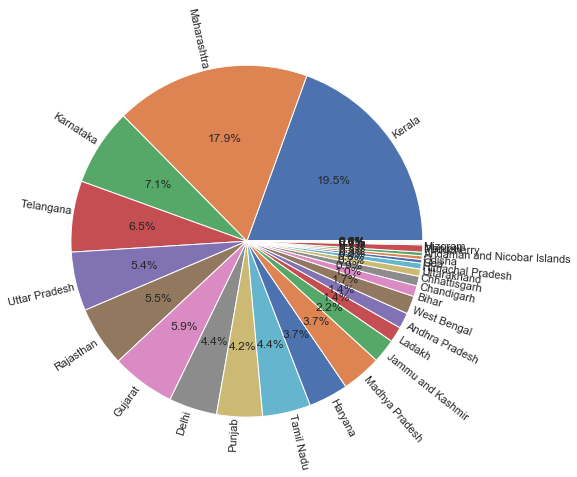

In [21]:
#explode = (0.2)
statewise_df.loc[1:,].set_index('State').plot(kind='pie',y='Confirmed',figsize=(12,7),radius=1.5,rotatelabels=True,labeldistance=1,legend=False,autopct='%1.1f%%')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

### RAW DATA

In [22]:
raw_data_df = dfs[0].copy()
raw_data_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1.0,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,...,Source_2,Source_3,Backup Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,...,https://weather.com/en-IN/india/news/news/2020...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
raw_data_df = col_headers(raw_data_df)
raw_data_df.head()

,1.0,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,...,Source_2,Source_3,Backup Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,...,https://weather.com/en-IN/india/news/news/2020...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,4,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
raw_data_df.shape

(1046, 25)

In [25]:
raw_data_df =  raw_data_df[['Patient Number','State Patient Number','Date Announced','Age Bracket','Gender','Detected District','Detected State','Current Status','Backup Notes']]
raw_data_df.isna().sum()

0
Patient Number          135
State Patient Number    823
Date Announced          135
Age Bracket             623
Gender                  578
Detected District       245
Detected State          142
Current Status          142
Backup Notes            686
dtype: int64

In [64]:
raw_data_df.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Backup Notes
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Kerala,Recovered,Student from Wuhan
3,2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Kerala,Recovered,Student from Wuhan
4,3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kerala,Recovered,Student from Wuhan
5,4,DL-P1,02/03/2020,45,M,East Delhi,Delhi,Recovered,Travel history to Italy and Austria


In [69]:
raw_data_df.dtypes

0
Patient Number          object
State Patient Number    object
Date Announced          object
Age Bracket             object
Gender                  object
Detected District       object
Detected State          object
Current Status          object
Backup Notes            object
dtype: object

In [72]:
raw_data_df = raw_data_df.astype({"Age Bracket": 'float',"Date Announced":'datetime64[ns]'})
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 9 columns):
Patient Number          911 non-null object
State Patient Number    223 non-null object
Date Announced          911 non-null datetime64[ns]
Age Bracket             423 non-null float64
Gender                  468 non-null object
Detected District       801 non-null object
Detected State          904 non-null object
Current Status          904 non-null object
Backup Notes            360 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 81.7+ KB


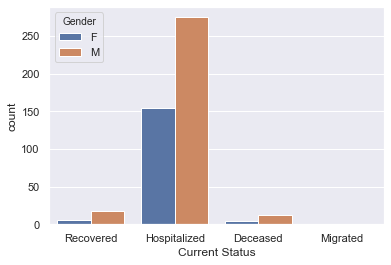

In [97]:
sns.countplot(raw_data_df['Current Status'], hue=raw_data_df['Gender'])

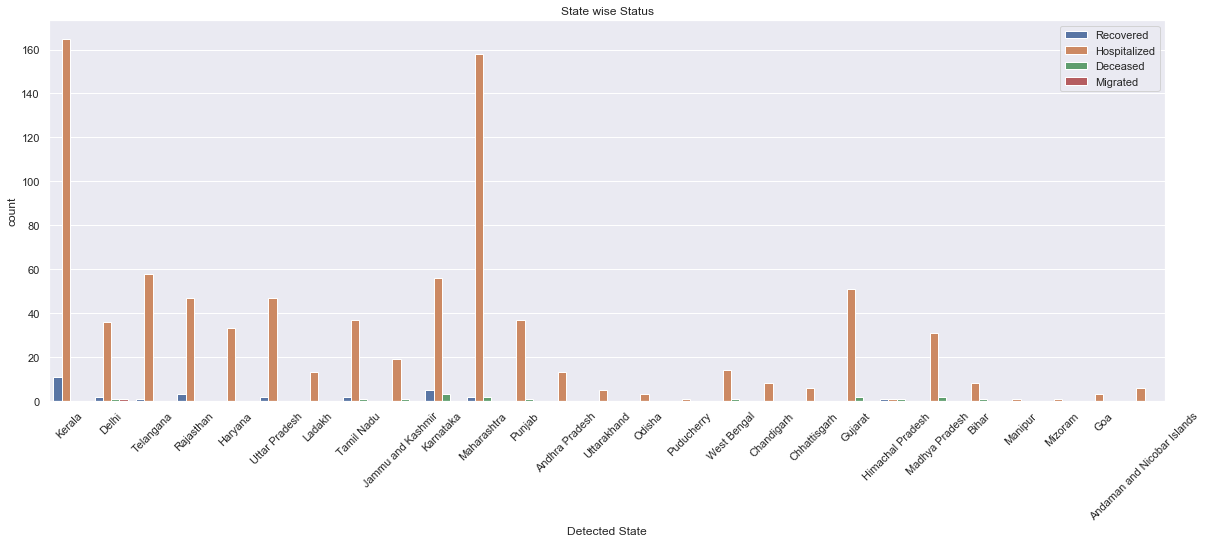

In [99]:
plt.figure(figsize=(20,7))
sns.countplot(raw_data_df['Detected State'],hue=raw_data_df['Current Status'])
plt.title('State wise Status')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

In [77]:
raw_data_df['Age Bracket'].fillna(-1)

1       -1.0
2       20.0
3       -1.0
4       -1.0
5       45.0
        ... 
1042    -1.0
1043    -1.0
1044    -1.0
1045    -1.0
1046    -1.0
Name: Age Bracket, Length: 1046, dtype: float64

In [80]:
raw_data_df['age_bins'] = pd.cut(x=raw_data_df['Age Bracket'], bins=[0, 19, 29, 39, 49, 59, 69, 79, 89, 99])
raw_data_df['age_bins'].head()

1             NaN
2    (19.0, 29.0]
3             NaN
4             NaN
5    (39.0, 49.0]
Name: age_bins, dtype: category
Categories (9, interval[int64]): [(0, 19] < (19, 29] < (29, 39] < (39, 49] ... (59, 69] < (69, 79] < (79, 89] < (89, 99]]

Text(0.5, 0, 'Age Groups')

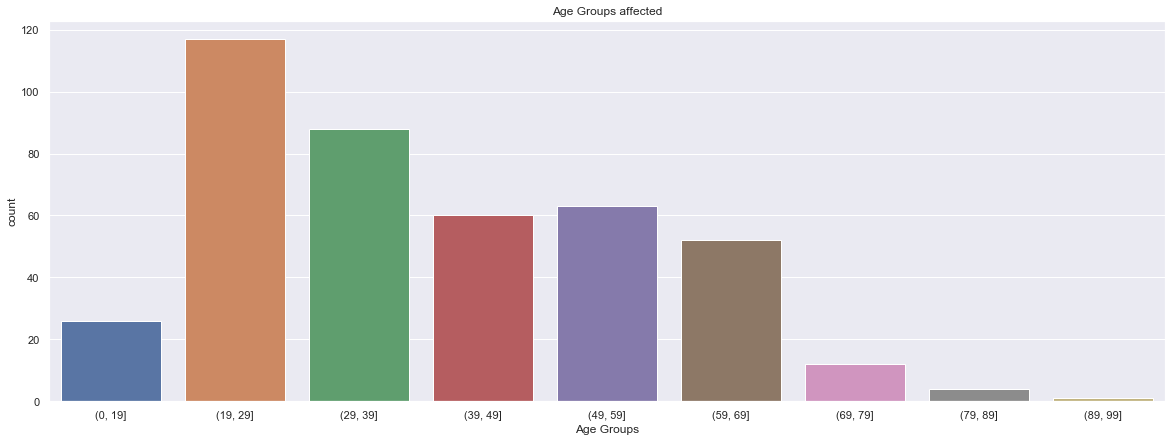

In [75]:
plt.figure(figsize=(20,7))
sns.countplot(raw_data_df.sort_values('age_bins')['age_bins'])
plt.title('Age Groups affected')
plt.xlabel('Age Groups')

# Bubble Map 

In [82]:
demo = raw_data_df.copy()
demo.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Backup Notes,age_bins
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,KL-TS-P1,2020-01-30,20.0,F,Thrissur,Kerala,Recovered,Student from Wuhan,"(19.0, 29.0]"
3,2,KL-AL-P1,2020-02-02,NaN,NaN,Alappuzha,Kerala,Recovered,Student from Wuhan,NaN
4,3,KL-KS-P1,2020-03-02,NaN,NaN,Kasaragod,Kerala,Recovered,Student from Wuhan,NaN
5,4,DL-P1,2020-02-03,45.0,M,East Delhi,Delhi,Recovered,Travel history to Italy and Austria,"(39.0, 49.0]"


In [88]:
lat = []
lon = []
geolocator = Nominatim(user_agent="GeocodeEarth")
for index,row in demo.iterrows():
    if row['Detected District'] != np.NaN:
        location = geolocator.geocode(row['Detected District'],timeout=10)
        if location == None:
            if row['Detected State'] != np.NaN:
                location = geolocator.geocode(row['Detected State'],timeout=10)
    if location != None:
        #print(index, location.address)
        lat.append(location.latitude)
        lon.append(location.longitude)
    else:
        lat.append(np.NaN)
        lon.append(np.NaN)

In [90]:
demo["Latitude"] = lat
demo["Longitude"] = lon
demo.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Backup Notes,age_bins,Latitude,Longitude
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.083591,75.552077
2,1,KL-TS-P1,2020-01-30,20.0,F,Thrissur,Kerala,Recovered,Student from Wuhan,"(19.0, 29.0]",10.525626,76.213254
3,2,KL-AL-P1,2020-02-02,NaN,NaN,Alappuzha,Kerala,Recovered,Student from Wuhan,NaN,9.488701,76.412564
4,3,KL-KS-P1,2020-03-02,NaN,NaN,Kasaragod,Kerala,Recovered,Student from Wuhan,NaN,12.421713,75.190450
5,4,DL-P1,2020-02-03,45.0,M,East Delhi,Delhi,Recovered,Travel history to Italy and Austria,"(39.0, 49.0]",28.620477,77.309181


In [96]:
m = folium.Map(location=[20.5937,78.9629], zoom_start=5)
 
# I can add marker one by one on the map
#for i in range(0,len(data)):
#   folium.Circle(
#      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
#      popup=data.iloc[i]['name'],
#      radius=data.iloc[i]['value']*10000,
#      color='crimson',
#      fill=True,
#      fill_color='crimson'
#   ).add_to(m)
for lat, lon, name in zip(demo['Latitude'], demo['Longitude'], demo['Detected District']):
    # only use the first neighborhood to label on the map
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(m)
    
m

###  Cases reported

In [27]:
cases_df = dfs[5].copy()
cases_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1.0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
1,2.0,30 January,1,1,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,31 January,0,1,0,0,0,0
4,4.0,01 February,0,1,0,0,0,0


In [28]:
cases_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [29]:
cases_df = col_headers(cases_df)
cases_df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
1,30 January,1,1,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31 January,0,1,0,0,0,0
4,01 February,0,1,0,0,0,0
5,02 February,1,2,0,0,0,0


In [30]:
cases_df.isna().sum()

0
Date               16
Daily Confirmed    16
Total Confirmed    16
Daily Recovered    16
Total Recovered    16
Daily Deceased     16
Total Deceased     16
dtype: int64

In [31]:
cases_df.dropna(axis=0,inplace=True)
cases_df.reset_index(drop=True, inplace=True)
cases_df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [32]:
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
Date               58 non-null object
Daily Confirmed    58 non-null object
Total Confirmed    58 non-null object
Daily Recovered    58 non-null object
Total Recovered    58 non-null object
Daily Deceased     58 non-null object
Total Deceased     58 non-null object
dtypes: object(7)
memory usage: 3.3+ KB


In [33]:
cases_df = cases_df.astype({"Daily Confirmed": 'int', "Total Confirmed": 'int', "Daily Recovered": 'int',"Total Recovered":'int', "Daily Deceased": 'int',"Total Deceased":'int'})
cases_df.dtypes

0
Date               object
Daily Confirmed     int32
Total Confirmed     int32
Daily Recovered     int32
Total Recovered     int32
Daily Deceased      int32
Total Deceased      int32
dtype: object

In [34]:
cases_df['Date'] =  cases_df['Date'] + " 2020"

In [35]:
cases_df['Date'] = pd.to_datetime(cases_df['Date'], format='%d %B %Y')

In [36]:
cases_df.set_index('Date', inplace=True)

Text(0, 0.5, 'Number of Cases')

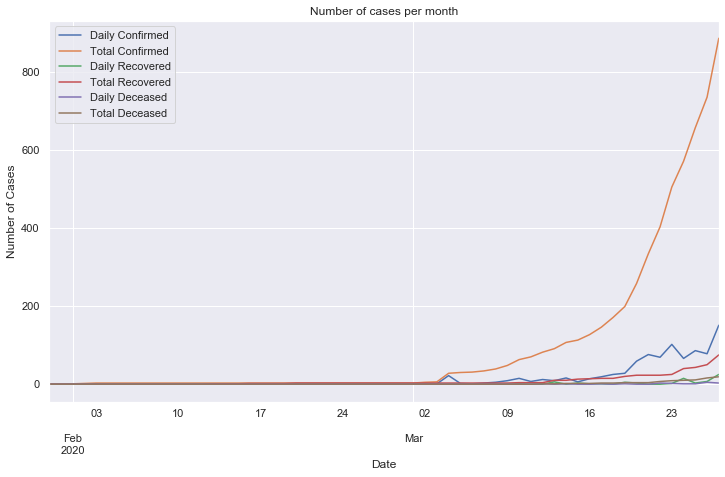

In [37]:
cases_df.plot(figsize=(12,7))
plt.legend()
plt.title('Number of cases per month')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

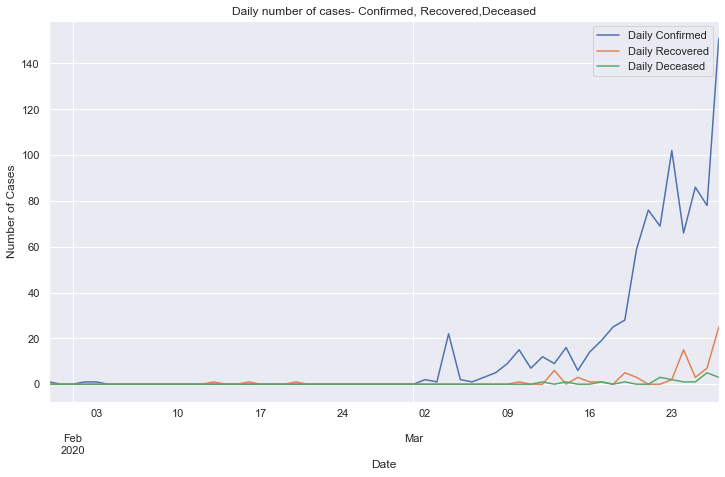

In [38]:
cases_df[['Daily Confirmed','Daily Recovered','Daily Deceased']].plot(figsize=(12,7))
plt.legend()
plt.title('Daily number of cases- Confirmed, Recovered,Deceased')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

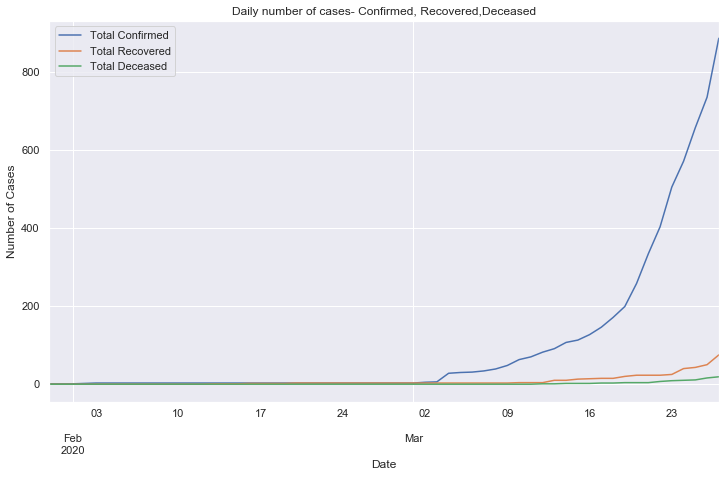

In [39]:
cases_df[['Total Confirmed','Total Recovered','Total Deceased']].plot(figsize=(12,7))
plt.legend()
plt.title('Daily number of cases- Confirmed, Recovered,Deceased')
plt.ylabel('Number of Cases')